In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPool2D,ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

print(tf.__version__)

2.0.0-rc0


In [0]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from tqdm import tqdm

In [0]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 8.54 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [0]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
data.shape

(7254, 27)

In [0]:


img_width = 250
img_height = 250

X = []

for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/'+ data['Id'][i] +'.jpg'
  img = image.load_img(path, target_size = (img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:32<00:00, 220.05it/s]


In [0]:
X.shape

(7254, 250, 250, 3)

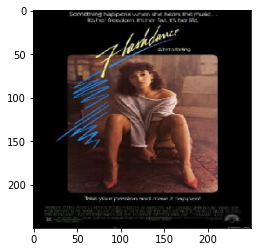

In [0]:
plt.imshow(X[1])

In [0]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [0]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =0)

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout((0.3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout((0.3)))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout((0.4)))


model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout((0.5)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 248, 248, 16)      448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 248, 248, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 122, 122, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)       

In [0]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs= 5, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6165/6165 [==============================] - 681s 110ms/sample - loss: 0.5955 - accuracy: 0.7099 - val_loss: 1.0917 - val_accuracy: 0.7412
Epoch 2/5
6165/6165 [==============================] - 678s 110ms/sample - loss: 0.2693 - accuracy: 0.9066 - val_loss: 1.9445 - val_accuracy: 0.7158
Epoch 3/5
6165/6165 [==============================] - 676s 110ms/sample - loss: 0.2447 - accuracy: 0.9119 - val_loss: 0.9825 - val_accuracy: 0.8361
Epoch 4/5
 800/6165 [==>...........................] - ETA: 9:19 - loss: 0.2367 - accuracy: 0.9133

In [0]:
def polt_learningCurve(history):
  epoch_range = range(1,6)

  plt.plot(epoch_range, history.history["accuracy"])
  plt.plot(epoch_range, history.history["val_accuracy"])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['Train', 'Test'], loc = 'upper left')
  plt.show()

  plt.plot(epoch_range, history.history["loss"])
  plt.plot(epoch_range, history.history["val_loss"])
  plt.title("Model loss")
  plt.ylabel("loss")
  plt.xlabel("Epoch")
  plt.legend(['Train', 'Test'], loc = 'upper left')
  plt.show()

In [0]:
polt_learningCurve(history)

In [0]:

img = image.load_img('/content/Movies-Poster_Dataset/fast.jpg', target_size = (img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1,img_width, img_height, 3 )

In [0]:
classes = data.columns[2:]

In [0]:
print(classes)

In [0]:
y_pred = model.predict(img)
y_pred

In [0]:
y_pred

In [0]:
top3 = np.argsort(y_pred[0])[:-4:-1]
top3

In [0]:
for i in range(3):
  print(classes[top3[i]])